# ARIMA模型（AutoregRessive Integrated Moving Average）

**ARIMA属于自回归模型**
- 自回归模型是用自身的数据进行预测

**ARIMA模型要求数据具有自相关性和平稳性**
- 自相关性：自相关性系数要大于0.5
- 平稳性：序列的均值和方差不发生明显的变化,包括严平稳&弱平稳
    - 严平稳：数据必须有自有规律，或者“惯性”可以用来预测，而不是随机产生的。即此时的值与之前的数据有关联而不是无关的。 要求数据的均值和方差不发生不明显的变化。严平稳表示的分布不随时间的改变而改变，如白噪声（正太），无论怎么取，期望都是0，方差为1
    - 弱平稳：期望与相关系数（依赖性）不变，未来某时刻的值要依赖于它过去的信息
    
**数据保持平稳性的方法**
- 差分法：后一刻数据减去前一刻的数据（一阶差分），在一阶差分结果上，做同样的事得到二阶差分

**ARIMA模型：差分自回归移动平均模型**
- **AR：自回归模型**
    - 描述当前值与历史值得关系，利用变量自身的历史数据进行接下来的预测。
    - p阶自回归定义：
    $$
           y_t = \mu + \sum^{p}_{i = 1}{r_iy_{t-i}}+ \epsilon_t
    $$
    $y_t$是当前值，$\mu$是常数项，$p$是阶数（当前值与前面多少个历史值有关），$\epsilon$是误差
- **MA：移动平均模型**
    - 移动平均模型关注的是自回归模型中的误差项的累加
    - 移动平均法能有效的消除预测中的随机波动
    - q阶自回归定义：
    $$
           y_t = \mu + \sum^{q}_{i = 1}{\theta_i\epsilon_{t-i}}+ \epsilon_t
    $$
    $y_t$是当前值，$\mu$是常数项，$q$是阶数（当前值与前面多少个历史值有关），$\epsilon$是误差
- **ARMA：自回归移动平均模型**
    - 自回归与移动平均模型的结合
    - 定义
    $$
           y_t = \mu + \sum^{p}_{i = 1}{r_iy_{t-i}}+ \sum^{q}_{i = 1}{\theta_i\epsilon_{t-i}} +\epsilon_t
    $$
    $y_t$是当前值，$\mu$是常数项，$p、q$是阶数（当前值与前面多少个历史值有关）是需要我们自己指定的值，$r_i$和$\theta_i$是待求解的参数，$\epsilon$是误差
- **I：表示差分**

**使用`statemodels`**
- 需要指定参数（p，d，q）其中，p、q:阶数，d：差分次数

- AR是自回归，p为自回归项；

- I表示差分，d为时间序列成为平稳时所作的差分次数

- MA为移动平均，q为移动平均项数；

- （p、d、q）这三个参数解释了数据的seasonality（季节性）, trend（趋势）和noise（噪声）

- 原理：将非平稳的时间序列转化为平稳的时间序列然后将因变量仅对它的滞后值以及随机误差项的现值和滞后值进行回归所建立的模型。

**p、q值的选择**
- **自相关函数ACF**
    - 自相关函数ACF 有序的随机变量序列与自身相比较 自相关函数反映了同一序列在不同时序的取值之间的相关性
    - 公式
    $$
                ACF(k) = \rho_k = \frac{Cov(y_t,y_{t-k})}{Var(y_t)}
    $$
    - Pk的取值范围为【-1,1】
    
- **偏自相关函数**
    - 1,2...t-1,t,对于AR(P)的模型来说，求出的滞后k自相关系数p(k)时，并不是X(t)与X(t-k)之间的相关系数，因为X(t)的值还会受到两者中间值的影响，加入剔除中间值的影响，只算两者间的自相关性的函数，就叫做偏自相关函数。

**ARIMA（p、d、q）阶数确定**


模型 | ACF | PACF
- | - | -
AR(p) | 衰减趋于零 | **p阶后结尾** |
MA(q) | **q阶后截尾** |衰减趋于零 |
ARMA(p,q) | q阶后衰减趋于零 | p阶后衰减趋于零 |

*`截尾`：落在置信区间内*

*`AR模型`：看PACF是否满足*

*`MA模型`：看ACF是否满足*

### 整体流程
- （1）差分平稳化
- （2）确定p、q范围：看原始数据（未做差分）的ACF和PACF
- （3）调用模型ARIMA：（网格搜索）选择最好的参数组合
    - **模型参数评估**：选择更加简单的模型
        - AIC：赤池信息准则
        $$
                AIC = 2k-2ln(L)
        $$
        - BIC：贝叶斯信息准则
        $$
                BIC = kln(n) - 2ln(L)
        $$
        - $k$为模型参数个数，$n$为样本数量，$L$为似然函数，$AIC$与$BIC$越低越好
        - 根据AIC&BIC（AIC或者BIC优点类似于损失函数+模型惩罚项）的热度图，选择最合适的p、q参数
        
### 模型残差检验
- 模型的参数是否是均值为0且方差为常数的正态分布
- QQ图，线性即正态分布
#### 参考
- 文章：https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#step-4-—-parameter-selection-for-the-arima-time-series-model
- 视频：https://www.bilibili.com/video/av26089067/?p=5

## 快速上手

## 总结
#### 流程

## 代码样例

In [14]:
# 数据加载

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

# 图片清晰度
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 中文显示
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['font.sans-serif'] = ['FangSong']    # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False        # 解决保存图像是负号'-'显示为方块的问题

path = "D:/homework/生猪价格预测/self/self-data/total_data.xlsx"
data = pd.read_excel(path,index_col = 0) #,index_col = 0
print(data.head())

             猪肉价格
日期               
2014-06-24  12.61
2014-07-01  12.62
2014-07-08  12.84
2014-07-15  13.23
2014-07-22  13.54


### 差分法

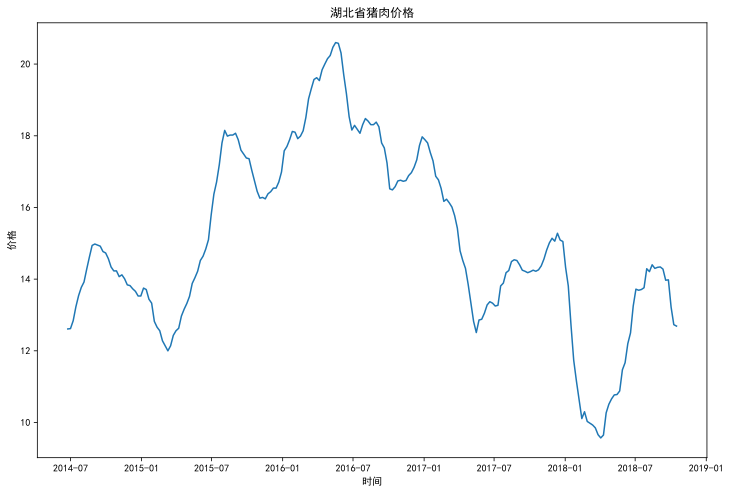

In [15]:
# 查看数据

y = data['猪肉价格']

fig = plt.figure(figsize=[12,8])

plt.title('湖北省猪肉价格')
plt.xlabel('时间')
plt.ylabel('价格')
plt.plot(y)

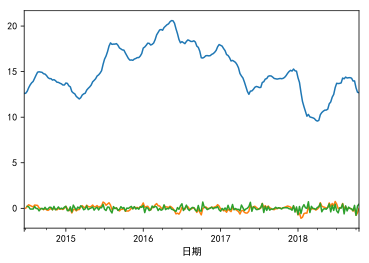

In [16]:
#### 观察发现数据波动较大，需要做差分,做1阶差分,然后得到2阶差分，因为data本身是Series，所以不用写['猪肉价格']这样的形式
data1 = y.diff(1)
y.plot()
data2 = data1.diff(1)
data1.plot()
data2.plot()

### 画 ACF & PACF

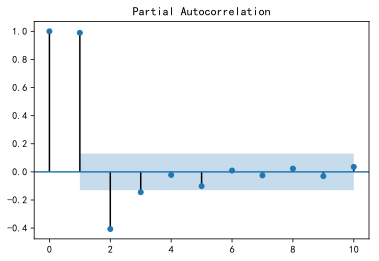

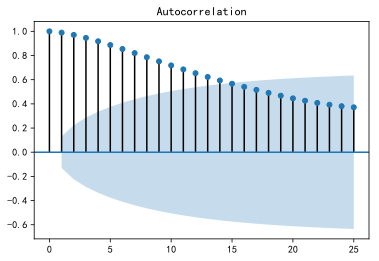

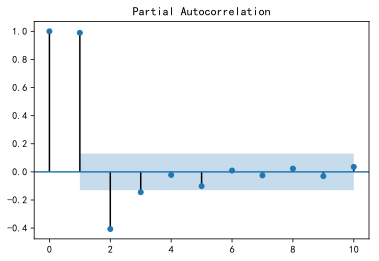

In [17]:
# 使用Anconada安装statsmodels
# 应该使用原始数据，而不是差分之后的数据
# ACF
sm.graphics.tsa.plot_acf(y,lags = 25)
# PACF
sm.graphics.tsa.plot_pacf(y,lags= 10)

### 模型建立与预测

In [18]:
# 建立模型
mode = sm.tsa.SARIMAX(y,order=(15,2,3))
# 进行预测
results = mode.fit()
results.aic

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-27.982936442618964

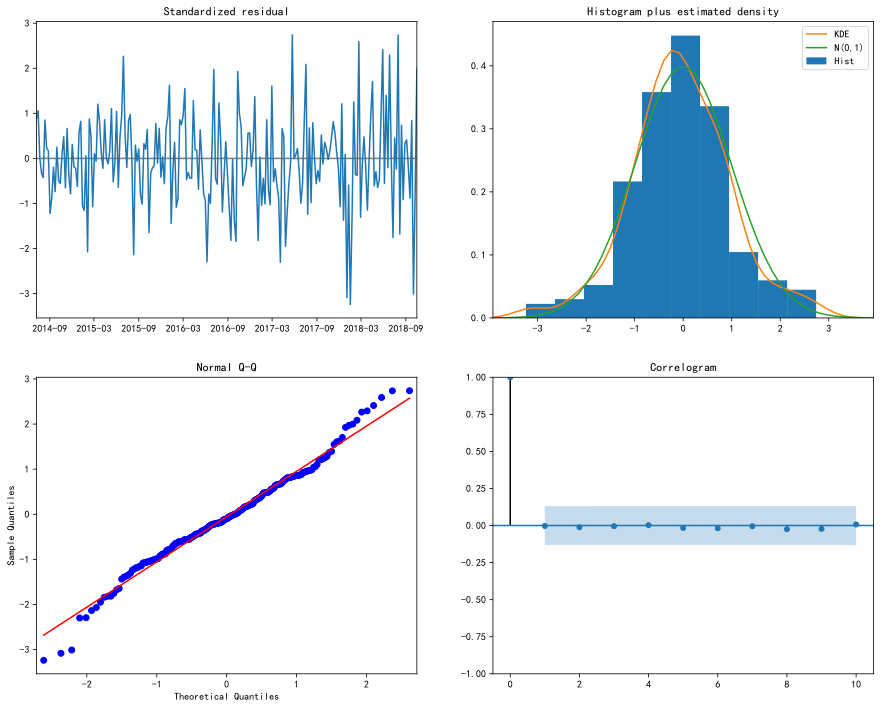

In [19]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### 我们主要看误差是否是不相关的和分布是否是正态的。
- 从右上角的图中可以看出，KDE线比较接近正态分布线
- 左下角的QQ图看在左下角的QQ图上，残差(蓝点)的有序分布符合标准正态分布样本的线性趋势，N(0，1)。同样，这也是一个强有力的迹象，
表明残差是正态分布的。
- 随着时间的推移，残差(左上角图)不显示任何明显的季节性，似乎是白噪音。右下角的自相关(即相关图)图证实了这一点，表明时间序列残差与自身滞后
版本的相关性较低。

### 验证预测
get_predict()和conf_int()函数允许我们获得时间序列预测的值和相关的置信区间

In [36]:
# 代码中要求从2018-09-08日开始进行预测，Dynamic=false参数确保我们提前一步做出预测，这意味着每个点的预测都是使用整个历史到那个点的。
pred = results.get_prediction(start=pd.to_datetime('2018-09-18'), dynamic=False) # 这里pred是预测出来的对象，但并不是具体的数字，它带有多个属性

pred_ci = pred.conf_int() # 预测的范围

pred.predicted_mean  # 预测的平均值

print(pred.predicted_mean)

print(pred_ci)

2018-09-18    14.151262
2018-09-25    13.807582
2018-10-02    13.840326
2018-10-09    12.888202
2018-10-16    12.278165
Freq: W-TUE, dtype: float64
            lower 猪肉价格  upper 猪肉价格
2018-09-18   13.747628   14.554896
2018-09-25   13.403950   14.211214
2018-10-02   13.436696   14.243955
2018-10-09   12.484575   13.291830
2018-10-16   11.874540   12.681790


### 画图比较真实值与预测值（带有置信区间）

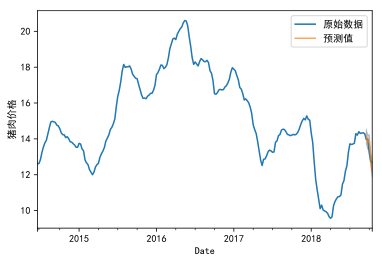

In [26]:
ax = y['2014/6/24':].plot(label='原始数据') # 前面是画图的开始时刻，后面是label
pred.predicted_mean.plot(ax=ax, label='预测值', alpha=.7)

# 两个线之间的函数填充
ax.fill_between(pred_ci.index,                           # x轴
                pred_ci.iloc[:, 0],                      # 第一条线的y轴：这里是lower猪肉价格
                pred_ci.iloc[:, 1],                      # 第二条线的y轴：这里是upper猪肉价格
                color='k', 
                alpha=.2) 

ax.set_xlabel('Date')
ax.set_ylabel('猪肉价格')
plt.legend()

plt.show()

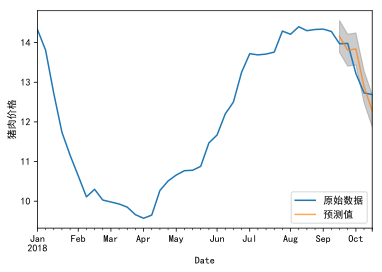

In [38]:
### 画出局部的函数
ax = y['2018/1/2':].plot(label='原始数据') # 前面是画图的开始时刻，后面是label
pred.predicted_mean.plot(ax=ax, label='预测值', alpha=.7)

# 两个线之间的函数填充
ax.fill_between(pred_ci.index,                           # x轴
                pred_ci.iloc[:, 0],                      # 第一条线的y轴：这里是lower猪肉价格
                pred_ci.iloc[:, 1],                      # 第二条线的y轴：这里是upper猪肉价格
                color='k', 
                alpha=.2) 

ax.set_xlabel('Date')
ax.set_ylabel('猪肉价格')
plt.legend()

plt.show()

### 评价指标：MSE（Mean Squared Error）
使用MSE对误差进行评估

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-09-08':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2))) # round:截取小数点后两位

The Mean Squared Error of our forecasts is 0.13


In [ ]:
### 使用动态预测
然而，使用动态预测可以更好地表达我们真实的预测能力。在这种情况下，我们只使用从时间序列到某个点的信息，然后使用以前预测的时间点的值生成预测。

In [40]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-09-18'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

### 画出动态预测图

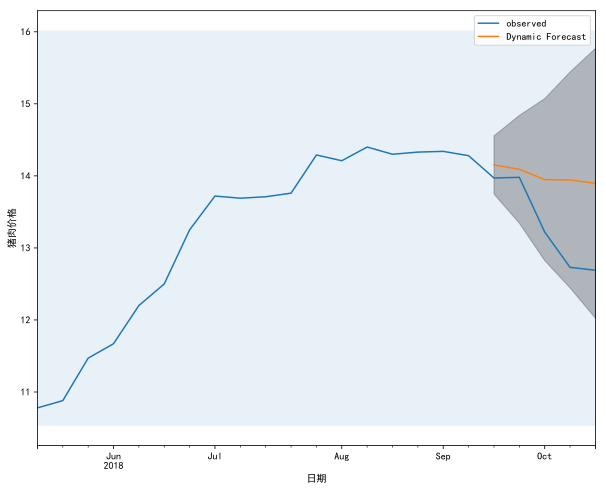

In [44]:
ax = y['2018/5/15':].plot(label='observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

# 填执行区间
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

# 填矩形色块
ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2018-01-02'),  # 色块开始的时间
                 y.index[-1],
                 alpha=.1, 
                 zorder=-1)

ax.set_xlabel('日期')
ax.set_ylabel('猪肉价格')

plt.legend()
plt.show()

In [45]:
### 计算动态预测的差值
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-09-18':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.7


## 产生真正的预测
使用`get_forecast()`函数预测将来的值

In [48]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

### 作图

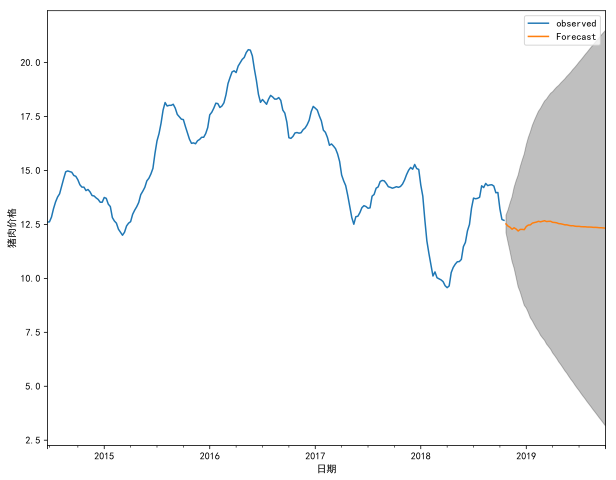

In [49]:
# 逐渐扩大的大面积的灰色部分，代表预测的越远，对于我们的预测数据越没有信心
ax = y.plot(label='observed', figsize=(10, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], 
                color='k', 
                alpha=.25)

ax.set_xlabel('日期')
ax.set_ylabel('猪肉价格')

plt.legend()
plt.show()

### 输出预测的数值

In [50]:
print(pred_uc.predicted_mean)

2018-10-23    12.524159
2018-10-30    12.422708
2018-11-06    12.369143
2018-11-13    12.278272
2018-11-20    12.345653
2018-11-27    12.287018
2018-12-04    12.196581
2018-12-11    12.270673
2018-12-18    12.271217
2018-12-25    12.258804
2019-01-01    12.406208
2019-01-08    12.470793
2019-01-15    12.480178
2019-01-22    12.562146
2019-01-29    12.587099
2019-02-05    12.608654
2019-02-12    12.645741
2019-02-19    12.622370
2019-02-26    12.646583
2019-03-05    12.672797
2019-03-12    12.634578
2019-03-19    12.644198
2019-03-26    12.645971
2019-04-02    12.598016
2019-04-09    12.590994
2019-04-16    12.575982
2019-04-23    12.538054
2019-04-30    12.530257
2019-05-07    12.507201
2019-05-14    12.482777
2019-05-21    12.481473
2019-05-28    12.456495
2019-06-04    12.439048
2019-06-11    12.440718
2019-06-18    12.419996
2019-06-25    12.409830
2019-07-02    12.412055
2019-07-09    12.397140
2019-07-16    12.393080
2019-07-23    12.392825
2019-07-30    12.381023
2019-08-06    12